## Data Preparation

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('sales.csv')
df.head(10)

,order_id,customer_name,order_date,category,sub_category,price,region,city,qty
0,OD1,Harish,2017-11-08,Oil & Masala,Masalas,852.72,North,Vellore,341
1,OD2,Sudha,2017-11-08,Beverages,Health Drinks,599.20,South,Krishnagiri,120
2,OD3,Hussain,2017-06-12,Food Grains,Atta & Flour,2194.80,West,Perambalur,189
3,OD4,Jackson,2016-10-11,Fruits & Veggies,Fresh Vegetables,806.40,South,Dharmapuri,584
4,OD5,Ridhesh,2016-10-11,Food Grains,Organic Staples,1436.55,South,Ooty,82
5,OD6,Adavan,2015-06-09,Food Grains,Organic Staples,1982.30,West,Dharmapuri,103
6,OD7,Jonas,2015-06-09,Fruits & Veggies,Fresh Vegetables,479.08,West,Trichy,588
7,OD8,Hafiz,2015-06-09,Fruits & Veggies,Fresh Fruits,1699.24,West,Ramanadhapuram,828
8,OD9,Hafiz,2015-06-09,Bakery,Biscuits,609.07,West,Tirunelveli,877
9,OD10,Krithika,2015-06-09,Bakery,Cakes,1310.35,West,Chennai,663


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   customer_name  9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   category       9994 non-null   object 
 4   sub_category   9994 non-null   object 
 5   price          9994 non-null   float64
 6   region         9994 non-null   object 
 7   city           9994 non-null   object 
 8   qty            9994 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 702.8+ KB


In [4]:
df.describe()

,price,qty
count,9994.000000,9994.000000
mean,1121.659075,500.908745
std,472.619706,290.386917
min,275.000000,1.000000
25%,724.910000,245.000000
50%,1095.765000,499.000000
75%,1458.405000,754.000000
max,2367.400000,999.000000


In [5]:
df.isnull().sum()

order_id         0
customer_name    0
order_date       0
category         0
sub_category     0
price            0
region           0
city             0
qty              0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Feature Engineering

In [7]:
# Convert 'order_date' column to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Set 'order_date' as the index
df.set_index('order_date', inplace=True)

# Resample data by month and calculate the sum of prices
monthly_aggregated = df.resample('M').sum()

# Drop the 'qty' column
monthly_aggregated.drop(columns=['qty'], inplace=True)

print(monthly_aggregated)

                price
order_date           
2015-01-31   89902.50
2015-02-28   47904.06
2015-03-31  180583.22
2015-04-30  151578.05
2015-05-31  126383.96
2015-06-30  154703.48
2015-07-31  167381.54
2015-08-31  175736.01
2015-09-30  287006.72
2015-10-31  178260.96
2015-11-30  356450.23
2015-12-31  307179.16
2016-01-31   68521.68
2016-02-29   66707.38
2016-03-31  154103.42
2016-04-30  178270.35
2016-05-31  166563.09
2016-06-30  150963.28
2016-07-31  158824.20
2016-08-31  170981.65
2016-09-30  320805.85
2016-10-31  188129.09
2016-11-30  356411.28
2016-12-31  354484.74
2017-01-31  102718.20
2017-02-28  100298.68
2017-03-31  179035.99
2017-04-30  187955.97
2017-05-31  251532.80
2017-06-30  221744.26
2017-07-31  238147.64
2017-08-31  189451.59
2017-09-30  409683.70
2017-10-31  238650.63
2017-11-30  416991.29
2017-12-31  382485.03
2018-01-31  174311.10
2018-02-28  125109.67
2018-03-31  272910.04
2018-04-30  233171.66
2018-05-31  278796.75
2018-06-30  267100.82
2018-07-31  250437.05
2018-08-31

In [8]:
monthly_aggregated.head(10)

,price
order_date,
2015-01-31,89902.50
2015-02-28,47904.06
2015-03-31,180583.22
2015-04-30,151578.05
2015-05-31,126383.96
2015-06-30,154703.48
2015-07-31,167381.54
2015-08-31,175736.01
2015-09-30,287006.72


In [9]:
monthly_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2015-01-31 to 2018-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [10]:
df = monthly_aggregated.copy()

## Stationary Test

In [11]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df['price'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                 -3.622187
p-value                         0.005351
#lags used                      0.000000
number of observations used    47.000000
critical value (1%)            -3.577848
critical value (5%)            -2.925338
critical value (10%)           -2.600774
dtype: float64


# Split Data

In [12]:
# Split the data into train and test sets
train, test = df[:30], df[30:]

## ARIMA Model

In [13]:
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings("ignore")

In [14]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['price'],order=(10, 0, 5),seasonal_order=(10,0,5,12))
results=model.fit()

## Result Evaluation

<AxesSubplot:xlabel='order_date'>

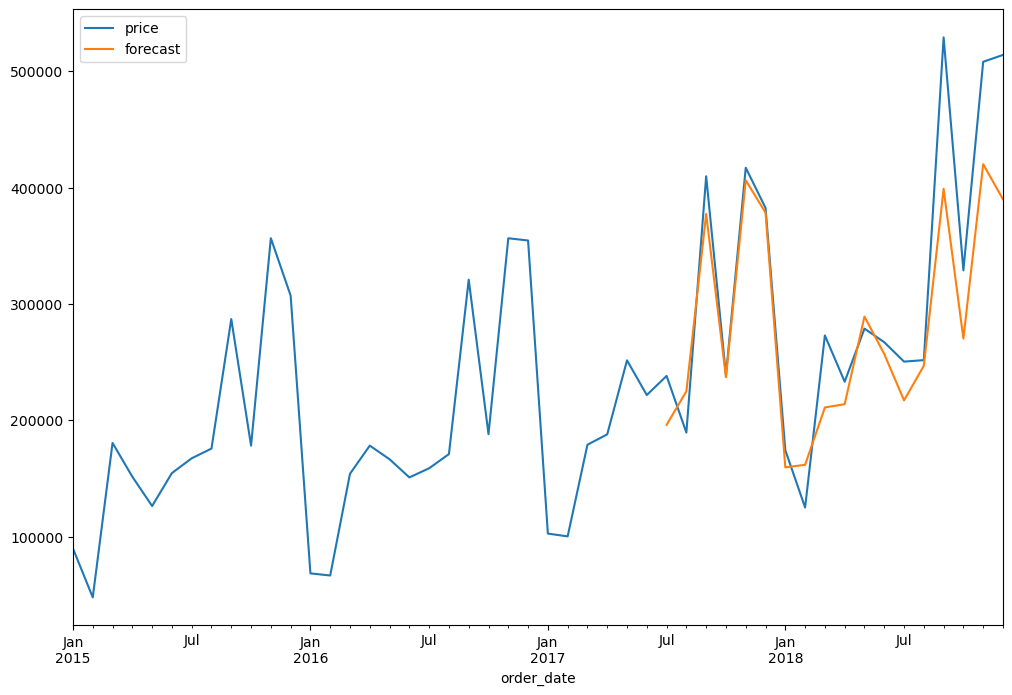

In [15]:
df['forecast']=results.predict(start=30,end=48,dynamic=True)
df[['price','forecast']].plot(figsize=(12,8))

In [16]:
from pandas.tseries.offsets import DateOffset

# Get the last date in the DataFrame
last_date = df.index[-1]

# Generate future dates for the next 6 months
future_dates = [last_date + DateOffset(months=x) for x in range(1, 13)]

# Create a DataFrame with the future dates and the same columns as the original DataFrame
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

# Print the future DataFrame
print(future_df)

           price forecast
2019-01-31   NaN      NaN
2019-02-28   NaN      NaN
2019-03-31   NaN      NaN
2019-04-30   NaN      NaN
2019-05-31   NaN      NaN
2019-06-30   NaN      NaN
2019-07-31   NaN      NaN
2019-08-31   NaN      NaN
2019-09-30   NaN      NaN
2019-10-31   NaN      NaN
2019-11-30   NaN      NaN
2019-12-31   NaN      NaN


In [17]:
# Combine Dataset
future_df=pd.concat([df,future_df])

## Forecasting next 1 month

<AxesSubplot:>

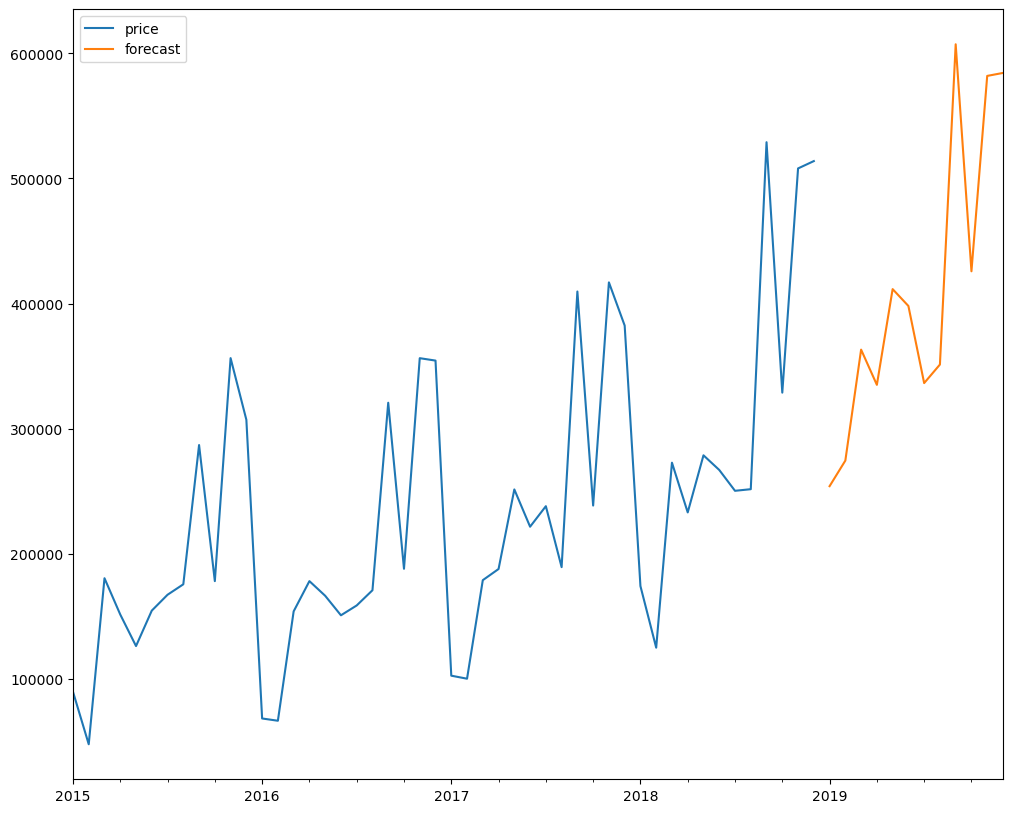

In [18]:
# Predict Forecast and Forecast Plotting

future_df['forecast'] = results.predict(start = 48, end = 60, dynamic= True)  
future_df[['price', 'forecast']].plot(figsize=(12, 10)) 

In [19]:
future_df['forecast'].tail(12)

2019-01-31    254135.031045
2019-02-28    274582.819762
2019-03-31    363243.670444
2019-04-30    335101.514864
2019-05-31    411596.492412
2019-06-30    398129.193616
2019-07-31    336503.581097
2019-08-31    351328.941273
2019-09-30    607227.470887
2019-10-31    425833.565136
2019-11-30    581958.116537
2019-12-31    584324.269133
Name: forecast, dtype: float64